In [37]:
import torch
from evoVAE.models.standardVAE import StandardVAE
from evoVAE.encoders.minimal_encoder import MinEncoder
from evoVAE.decoders.minimal_decoder import MinDecoder
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [7]:
inputDim = 28 * 28

bottleNeckDim = 512
latentDim = 2

encoder = MinEncoder(inputDim=inputDim, bottleNeckDim=bottleNeckDim)
decoder = MinDecoder(
    inputDim=bottleNeckDim, bottleNeckDim=bottleNeckDim, outputDim=inputDim
)

model = StandardVAE(
    inputDims=inputDim,
    bottleNeckDim=bottleNeckDim,
    latentDim=latentDim,
    encoder=encoder,
    decoder=decoder,
)

In [126]:
model.load_state_dict(torch.load("model_weights.pth", map_location=torch.device('cpu')))
model.eval()

StandardVAE(
  (encoder): MinEncoder(
    (linearReluStack): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Linear(in_features=512, out_features=512, bias=True)
      (3): ReLU()
    )
  )
  (zMuSampler): Linear(in_features=512, out_features=2, bias=True)
  (zLogvarSampler): Linear(in_features=512, out_features=2, bias=True)
  (latentUpscaler): Linear(in_features=2, out_features=512, bias=True)
  (decoder): MinDecoder(
    (linearReluStack): Sequential(
      (0): Linear(in_features=512, out_features=512, bias=True)
      (1): ReLU()
      (2): Linear(in_features=512, out_features=784, bias=True)
      (3): Softmax(dim=None)
    )
  )
)

In [127]:
training_data = datasets.FashionMNIST(
    root="data", train=True, download=False, transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data", train=False, download=False, transform=ToTensor()
)

train_loader = torch.utils.data.DataLoader(training_data, batch_size=128)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=128)

In [14]:
len(test_loader)

79

In [20]:
x, y = test_data[0]

In [28]:
flat_x = x.reshape(-1, 28 * 28).shape

tensor([[-0.2271, -1.2512]])


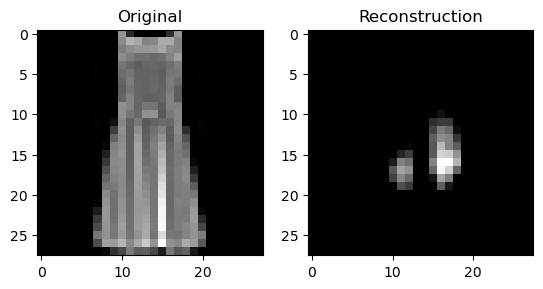

In [141]:
with torch.no_grad():
    for data, _ in train_loader:

        sample_idx = torch.randint(len(test_loader), size=(1,)).item()
        sample = data[sample_idx].reshape(-1, 28 * 28)
        modelOutput = model(sample)
        z = modelOutput[1]
        print(z)
        xHat = modelOutputs[0].reshape(1, 28, 28)   
        
        fig, axs = plt.subplots(1, 2)
        axs[0].imshow(data[sample_idx][0], cmap='gray')
        axs[0].set_title("Original")

        axs[1].imshow(xHat[0].numpy(), cmap='gray')
        axs[1].set_title("Reconstruction")
        break 
